In [34]:
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

import math

from matplotlib import pyplot

from mpl_toolkits.mplot3d import Axes3D  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv ('house_prices_data_training_data.csv')
#data.head()
data2 = data.drop('id',
               axis = 1)
data2 = data2.drop('date',
               axis = 1)
data2=data2.drop('price',
               axis = 1)
x_values=data2.to_numpy().astype(np.float64)
y_values=data['price'].to_numpy().astype(np.float64)
x_train=x_values[0:12600]
y_train=y_values[0:12600]
x_test=x_values[12601:17999]
y_test=y_values[12601:17999]
m=y_test.size

#linear regression
model1=LinearRegression().fit(x_train,y_train)
#now we test the error
y_predicted=model1.predict(x_test)
#data = np.loadtxt(os.path.join( 'house_prices_data_training_data.csv'), delimiter=',')
errors=y_predicted-y_test

mse=(np.dot((errors.T),errors))/(2*m)
print(mse/10000000000)

1.8207360312156067


In [26]:
#polynomial degree 2
poly_x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse/10000000000) #here I just divide by the same number each nime to investigate the optimum degree


1
1.2714543548123998


In [27]:
#polynomial degree 3

poly_x = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse/10000000000) #here I just divide by the same number each nime to investigate the optimum degree



1
2.4273946871925363


In [29]:
#polynomial degree 4

poly_x = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse/10000000000) #here I just divide by the same number each nime to investigate the optimum degree



1
10918.917425888008


In [31]:
#now it is clear that the optimum degree here is the second degree as what before is underfitting
#BUT it isclear that the error here is big so it must have been an overfitting happenned due to that we considered all the 
#variables at the beginning of calculations
#so simply we need here to iterate and test all the possible combinations of the variables we should consider
#and take the least error combination, BUT this requires huge compitation power and alot alot of time
# so i will investigate my data first and decide which data to consider trying to get the least error
#first I need to see heatmap

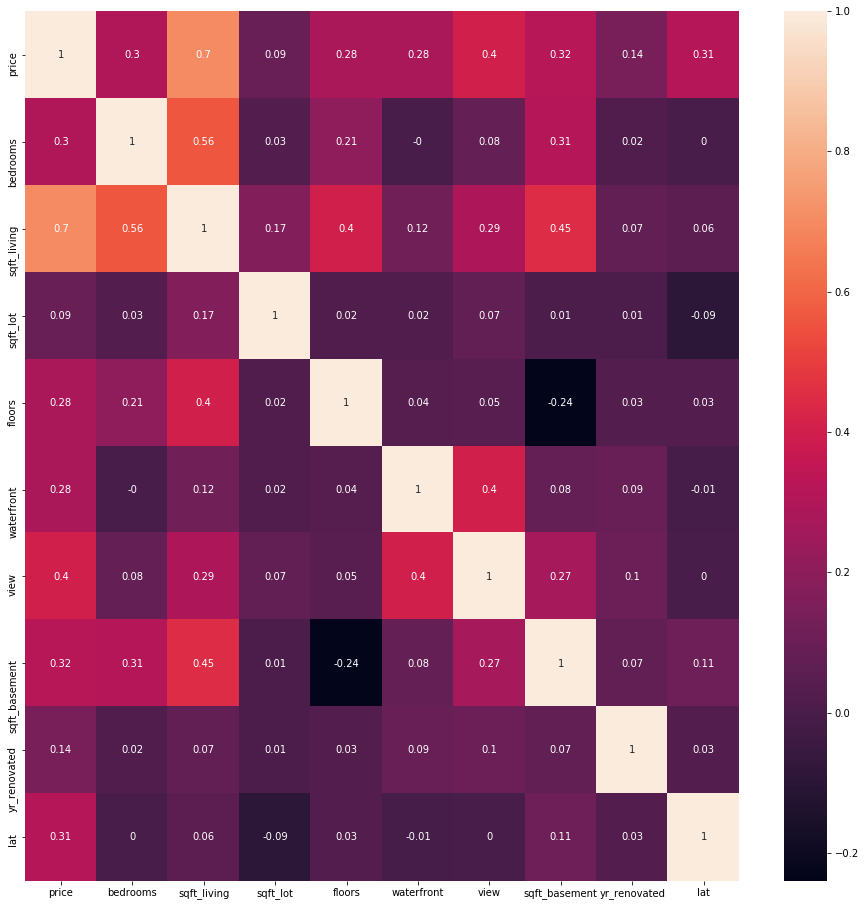

In [102]:
data = pd.read_csv ('house_prices_data_training_data.csv')
data = data.drop('sqft_living15',
               axis = 1)
data = data.drop('sqft_lot15',
               axis = 1)
data = data.drop('grade',
               axis = 1)
data = data.drop('sqft_above',
               axis = 1)
data = data.drop('bathrooms',
               axis = 1)
data = data.drop('condition',
               axis = 1)
data = data.drop('yr_built',
               axis = 1)
data = data.drop('zipcode',
               axis = 1)
data = data.drop('long',
               axis = 1)
data = data.drop('id',
               axis = 1)
data = data.drop('date',
               axis = 1)
figure = plt.figure(figsize=(16, 16))
sns.heatmap(data.corr().round(2), annot=True)

#I dropped the very high correlated variables between eachother and only let one of them stay which here was the square feet area 
#of different rooms
#also I removed the non correlated variables between the price and other variables correlation(approximately = 0)

In [104]:

data.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_basement,yr_renovated,lat
0,221900.0,3.0,1180.0,5650.0,1.0,0.0,0.0,0.0,0.0,47.5112
1,538000.0,3.0,2570.0,7242.0,2.0,0.0,0.0,400.0,1991.0,47.7210
2,180000.0,2.0,770.0,10000.0,1.0,0.0,0.0,0.0,0.0,47.7379
3,604000.0,4.0,1960.0,5000.0,1.0,0.0,0.0,910.0,0.0,47.5208
4,510000.0,3.0,1680.0,8080.0,1.0,0.0,0.0,0.0,0.0,47.6168


In [105]:

#df = pd.read_csv("house_prices_data_training_data.csv", usecols = ['bathrooms','sqft_living','grade','sqft_above','sqft_living15'])
#df.head()


In [110]:
x_values=data.to_numpy().astype(np.float64)
y_values=data['price'].to_numpy().astype(np.float64)
x_train=x_values[0:12600]
y_train=y_values[0:12600]
x_test=x_values[12601:17999]
y_test=y_values[12601:17999]
m=y_test.size

#linear regression
model1=LinearRegression().fit(x_train,y_train)
#now we test the error
y_predicted=model1.predict(x_test)
#data = np.loadtxt(os.path.join( 'house_prices_data_training_data.csv'), delimiter=',')
errors=y_predicted-y_test

mse=(np.dot((errors.T),errors))/(2*m)
print(mse)

8.000662021202009e-20


In [111]:
#polynomial degree 2
poly_x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse) #here I just divide by the same number each nime to investigate the optimum degree


1
1.0787574801469643e-11


In [113]:
#polynomial degree 3

poly_x = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse) #here I just divide by the same number each nime to investigate the optimum degree


1
3423488.4119022987


In [114]:
#polynomial degree 4

poly_x = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse) #here I just divide by the same number each nime to investigate the optimum degree



1
2197306097708.7346


In [101]:
#polynomial degree 5

poly_x = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=5, include_bias=False).fit_transform(x_test)
print(1)
model2=LinearRegression().fit(poly_x,y_train)
# print(poly_x)
#print(poly_x.size)
#print(x_train.size)
#print(x_test)
y_predicted=model2.predict(x_test_poly)
errors=y_predicted-y_test
mse=(np.dot((errors.T),errors))/(2*m)
print(mse) #here I just divide by the same number each nime to investigate the optimum degree


1
15685367912112.201


 it is clear that the linear regression is the best one, error is getting worse when complicating the Hypothesis because of overfitting
